# Ridge Classifier - spotify dataset

### Import all libraries

In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis (EDA)

In [628]:
data=pd.read_csv('data/spotify.csv')
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [629]:
data.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [630]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [631]:
data.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [632]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [633]:
data.duplicated().sum()

0

In [634]:
data.isna().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [635]:
data.shape

(2017, 17)

In [636]:
data.size

34289

In [637]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0','song_title'], inplace=True)

In [638]:
data['mode'].unique()

array([1, 0], dtype=int64)

In [639]:
data['target'].unique()#so it is a binary classification

array([1, 0], dtype=int64)

In [640]:
# data['mode'] = data['mode'].map({0:'No',1:'Yes'})

In [641]:
data['key'].nunique()

12

In [642]:
# Top 10 artists with the most songs
data['artist'].value_counts().head(10)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Crystal Castles     9
FIDLAR              9
Future              8
Fall Out Boy        8
Skrillex            8
Name: count, dtype: int64

### Outliers handling

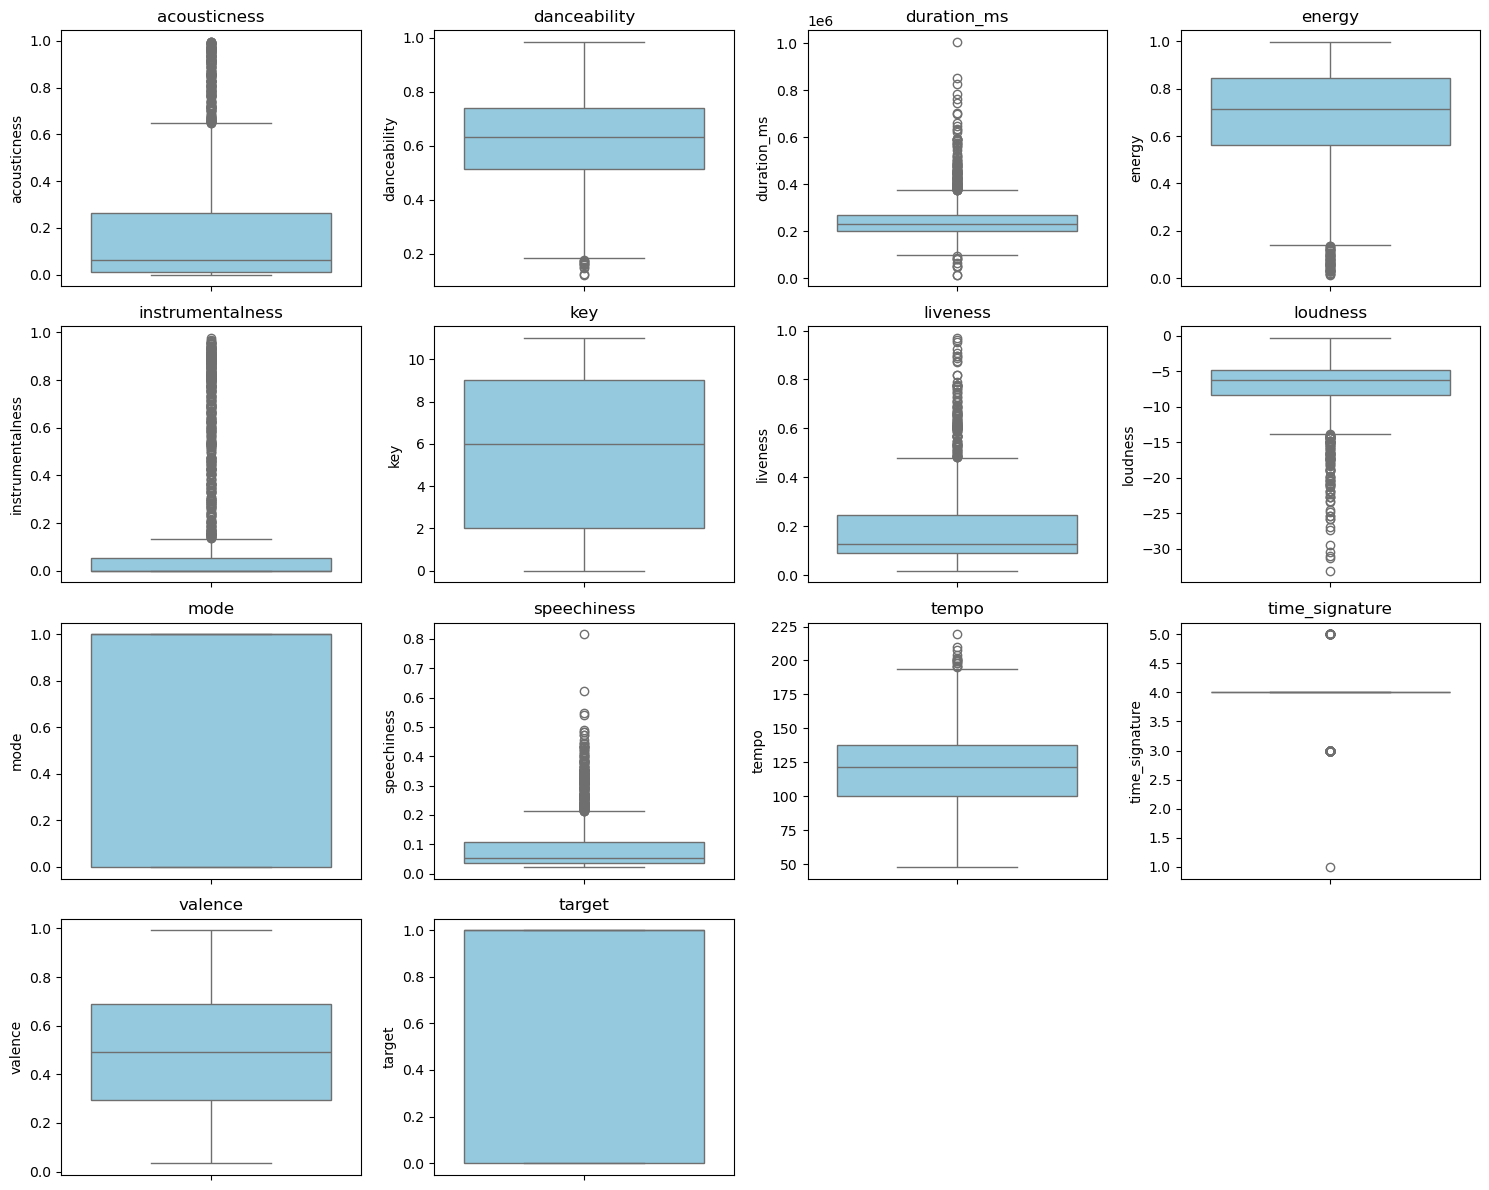

In [644]:
# Creating boxplots for each numeric column to check for outliers
numeric_columns = data.select_dtypes(include="number").columns

# Plotting
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.show()


In [645]:
# Outlier detection and replacement
for x in numeric_columns:
    print(x)
    descr = data[x].describe()  # Use describe() method
    IQR = descr['75%'] - descr['25%']
    upper_limit = descr['75%'] + 1.5 * IQR
    lower_limit = descr['25%'] - 1.5 * IQR
    #outlier replacement
    data[x][data[x]>upper_limit]=upper_limit
    data[x][data[x]<lower_limit]=lower_limit

    # # Outlier replacement using .loc
    # data.loc[data[x] > upper_limit, x] = upper_limit
    # data.loc[data[x] < lower_limit, x] = lower_limit

acousticness
danceability
duration_ms
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
time_signature
valence
target


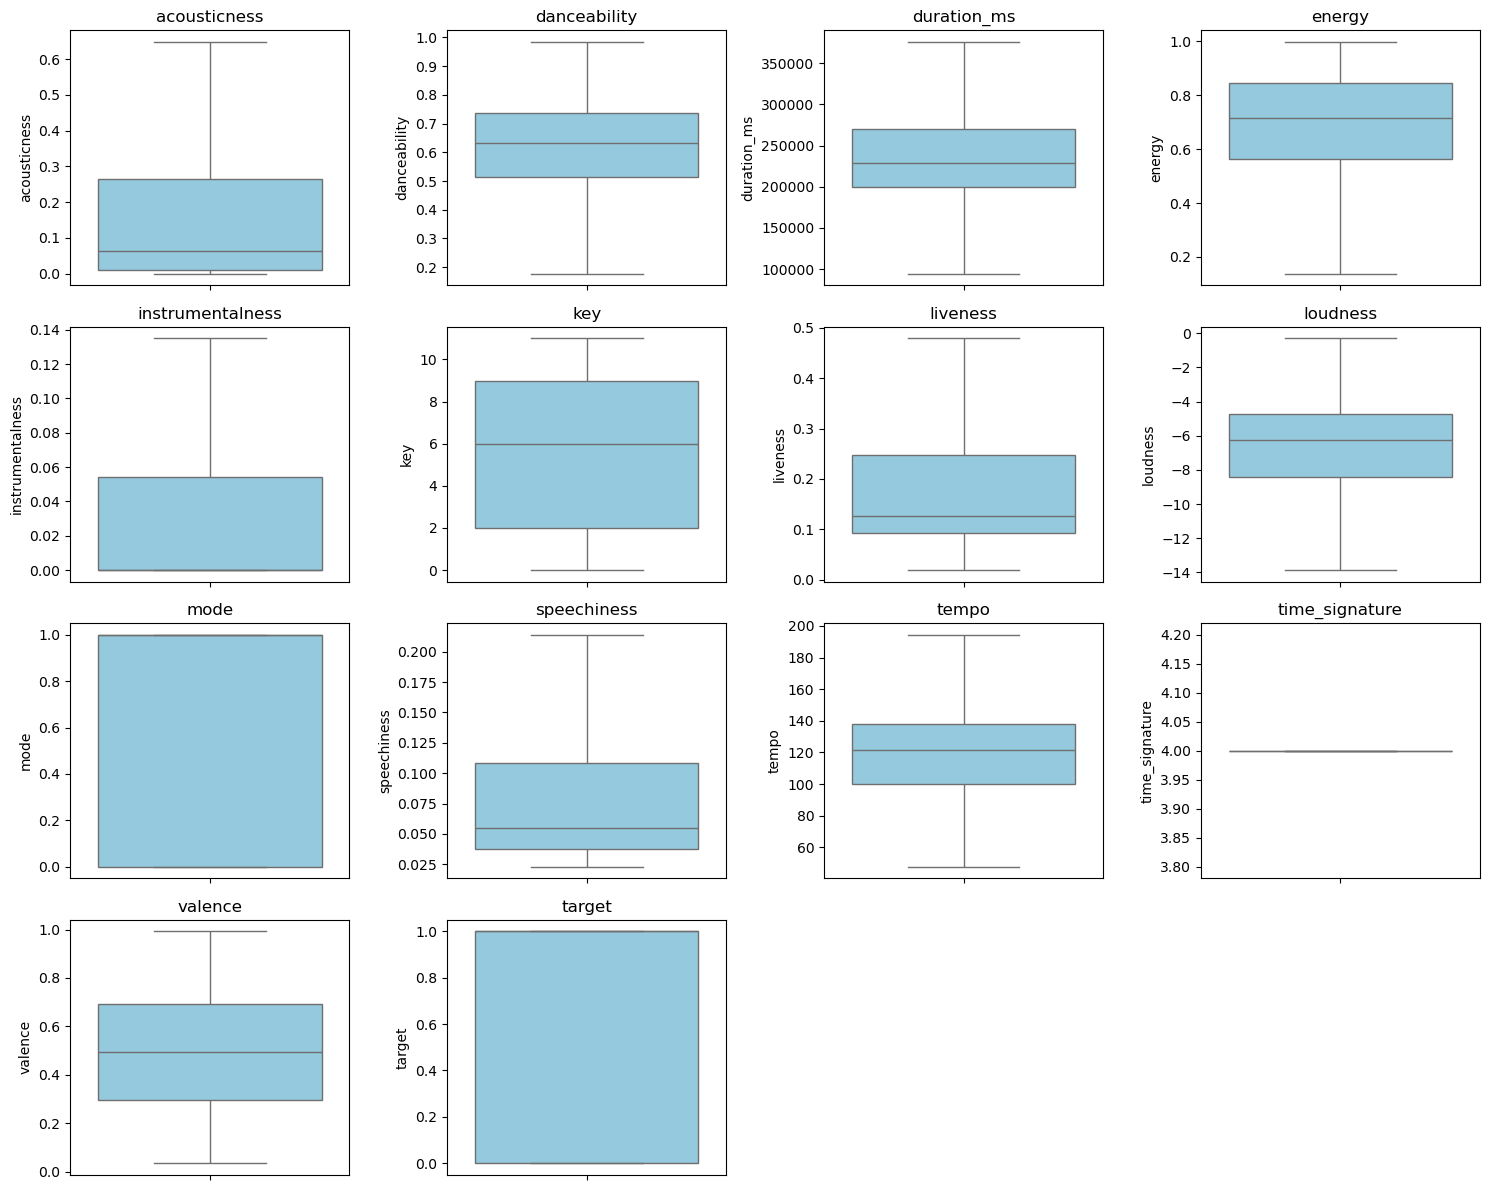

In [646]:
# Creating boxplots for each numeric column to check for outliers after handling
numeric_columns = data.select_dtypes(include="number").columns

# Plotting
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color="skyblue")
    plt.title(col)
    plt.tight_layout()

plt.show()


### Splitting X & Y

In [648]:
X = data.drop(['target'],axis=1)
y = data['target']

In [649]:
X.shape

(2017, 14)

In [650]:
y.shape

(2017,)

In [651]:
X = pd.get_dummies(X)

### Splitting data into test & train data

In [653]:
from sklearn.model_selection import train_test_split #this funciton split x and y randomnly-
#so for each time the output will be diffrent.to keep the data consistant we have to set a seed.random_state!=0, we are setting a seed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,random_state=42) #0.20 data will be for training.

In [654]:
y_train.value_counts()

target
1    822
0    791
Name: count, dtype: int64

In [655]:
X_train.shape

(1613, 1356)

### Logistic Regression

In [657]:
from sklearn.linear_model import LogisticRegression
cls=LogisticRegression()

In [658]:
#hyper parameters
from sklearn.model_selection import GridSearchCV #this is used for hyper parameter tuning

In [659]:
parameters={'penalty':['l1','l2','elasticnet',None],'C':[0.1,1,10,100,1000]}

In [660]:
classifier = GridSearchCV(cls, parameters)

In [661]:
classifier.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [662]:
classifier.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [663]:
cls_final = LogisticRegression(C=0.1,penalty='l2')
cls_final.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [664]:
y_pred=cls_final.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [665]:
#confusison matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred) #only the diagonal values are true predicitons.

array([[119,  87],
       [ 62, 136]], dtype=int64)

In [666]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6311881188118812

In [667]:
### Accuracy is too low.. We  need to consider alternative algorithms for this usecase

In [668]:
# END

### Ridge classifier

In [670]:
#Ridge CLassifier
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_classifier = GridSearchCV(ridge, parameters)
ridge_classifier.fit(X_train, y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [671]:
ridge_classifier.best_params_

{'alpha': 1}

In [672]:
ridge_classifier = RidgeClassifier(alpha=1)

ridge_classifier.fit(X_train,y_train)

RidgeClassifier(alpha=1)

In [673]:
y_pred_ridge=ridge_classifier.predict(X_test)

In [674]:
#confusison matrix
confusion_matrix(y_test,y_pred_ridge) #only the diagonal values are true predicitons.

array([[168,  38],
       [ 43, 155]], dtype=int64)

In [675]:
#accuracy
accuracy_score(y_test,y_pred_ridge)

0.7995049504950495

In [723]:
#END